In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Load and preprocess the dataset

In [3]:
data = pd.read_csv('amazon_reviews.csv')
df = data[['reviewText','overall']]
df = df.dropna()
df.columns = ['review','rating']
df = df.sample(frac=1, random_state=42)
df

,review,rating
2347,This super-speed card works great in my phone....,5.0
4344,I purchased this product knowing there might b...,1.0
692,Bought this to use with my Samsung HMX W300. W...,5.0
3910,This was an inexpensive way to get my Galaxy N...,5.0
2488,Purchased two 32 GBcards for the two new Sams...,4.0
...,...,...
4427,These cards never let you down. They are pric...,5.0
467,Purchased this as a memory addition for the Su...,5.0
3093,I paid less than $60 shipped to my door. Had i...,5.0
3773,"I formatted the card, saved the data from phon...",5.0


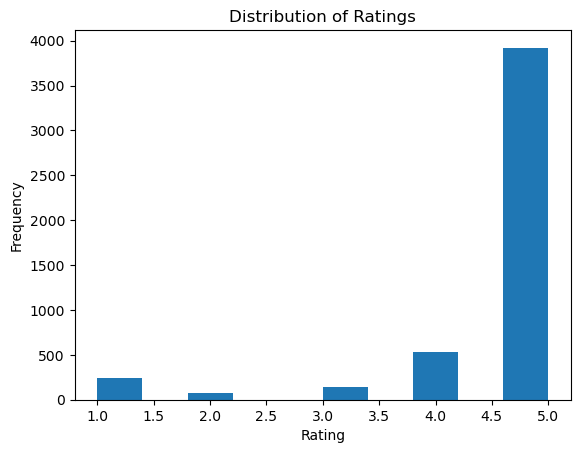

In [4]:
plt.hist(df['rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [5]:
X = df['review']
y = df['rating'].apply(lambda x: 1 if x > 3 else 0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define functions for each model

In [7]:
def logistic_regression(X_train, y_train, X_test, y_test):
    """Train a logistic regression model and compute its accuracy."""
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc

In [8]:
def decision_tree(X_train, y_train, X_test, y_test):
    """Train a decision tree model and compute its accuracy."""
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc

In [9]:
def random_forest(X_train, y_train, X_test, y_test):
    """Train a random forest model and compute its accuracy."""
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc

In [10]:
def support_vector_machine(X_train, y_train, X_test, y_test):
    """Train a support vector machine model and compute its accuracy."""
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc

# Evaluate the performance of each model and choose the best one

In [11]:
models = {
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Support Vector Machine': support_vector_machine
}

for name, model in models.items():
    acc = model(X_train, y_train, X_test, y_test)
    print(f'{name}: {acc:.2f}')

Logistic Regression: 0.91
Decision Tree: 0.88
Random Forest: 0.89
Support Vector Machine: 0.93


# Perform hyperparameter tuning on the best performing model

In [14]:
best_model = LinearSVC(C=1, penalty='l2')
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.2f}')

Best parameters: {'C': 1, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best score: 0.94


# Evaluate the performance of the tuned model on the test set

In [19]:
# Define a new model with the best hyperparameters
best_model = LinearSVC(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'],dual=grid_search.best_params_['dual'],loss=grid_search.best_params_['loss'])

# Vectorize the training and test sets with the final vectorizer
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)

# Fit the new model on the training set and predict on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the performance of the model on the test set
acc = accuracy_score(y_test, y_pred)
print(f'Tuned model accuracy: {acc:.2f}')

Tuned model accuracy: 0.93


In [23]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    labels = np.unique(y_true)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

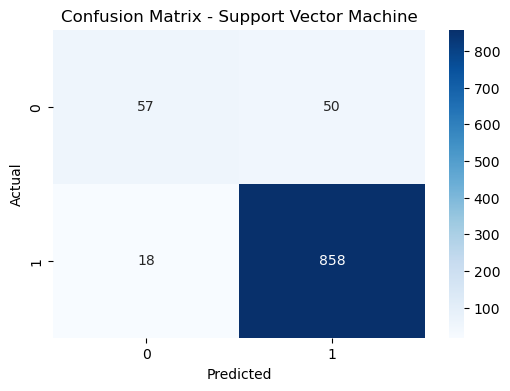

In [25]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix - Support Vector Machine')